In [1]:
!pip install imageio

In [2]:
%matplotlib inline
import imageio
import requests
import matplotlib.pyplot as plt
import IPython.display as dp

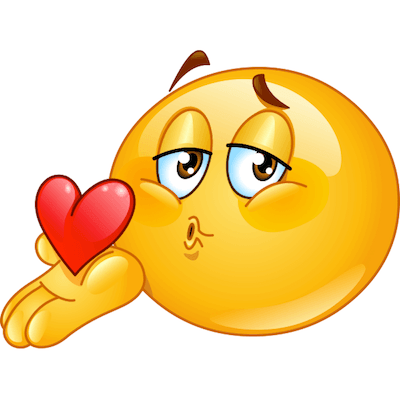

In [3]:
img = 'https://www.smileysapp.com/emojis/smiley-blowing-a-kiss.png'
dp.Image(requests.get(img).content)

In [4]:
source_img = imageio.imread(img)

In [5]:
import numpy as np
def grayscaleing(rgb):
  return np.dot(rgb[...,:3],[0.299,0.587,0.114])
gryscl_img = grayscaleing(source_img)

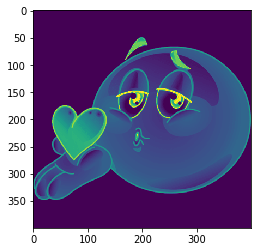

In [6]:
inv_img = (255 - gryscl_img)
plt.imshow(inv_img)

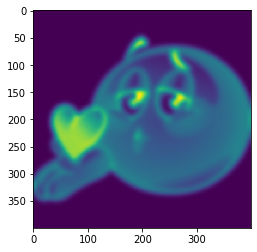

In [7]:
import scipy.ndimage
blurred_img = scipy.ndimage.filters.gaussian_filter(inv_img, sigma=5)
plt.imshow(blurred_img)

In [8]:
def dodging(blur_img,gryscl_img):
  resultant_dodge=blur_img*255/(255-gryscl_img)
  resultant_dodge[resultant_dodge>255]=255
  resultant_dodge[gryscl_img==255]=255
  return resultant_dodge.astype('uint8')

In [9]:
target_img= dodging(blurred_img, gryscl_img)

C:\Users\aloki\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\aloki\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\aloki\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


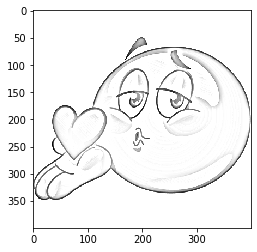

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(target_img, cmap='gray')